### General Background
Alfagift has a poor search system, if users typo then the app will show nothing

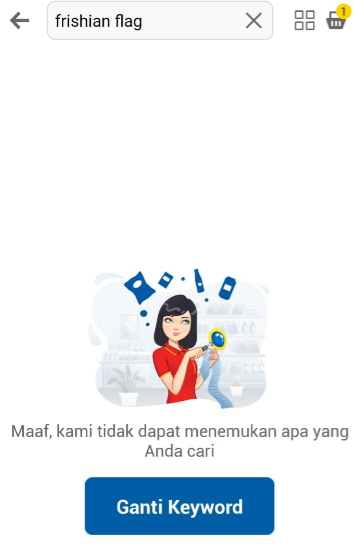

### Propose Solution = Sequence Matcher
It's a module that compare words and shows its ratio(how similar of two words are), at least it can define which one is typo

In [1]:
import pandas as pd
from difflib import SequenceMatcher

In [2]:
query_df = pd.read_excel('search_no_result.xlsx').head(20)
product_df = pd.read_excel('corpus.xlsx')

query_df = query_df.astype(str)
product_df = product_df.astype(str)

In [3]:
search = query_df[['search_keyword']]

In [4]:
search['index'] = range(len(search))
product_df['index'] = range(len(product_df))

### Looping the sequence matcher to all keyword and all corpus
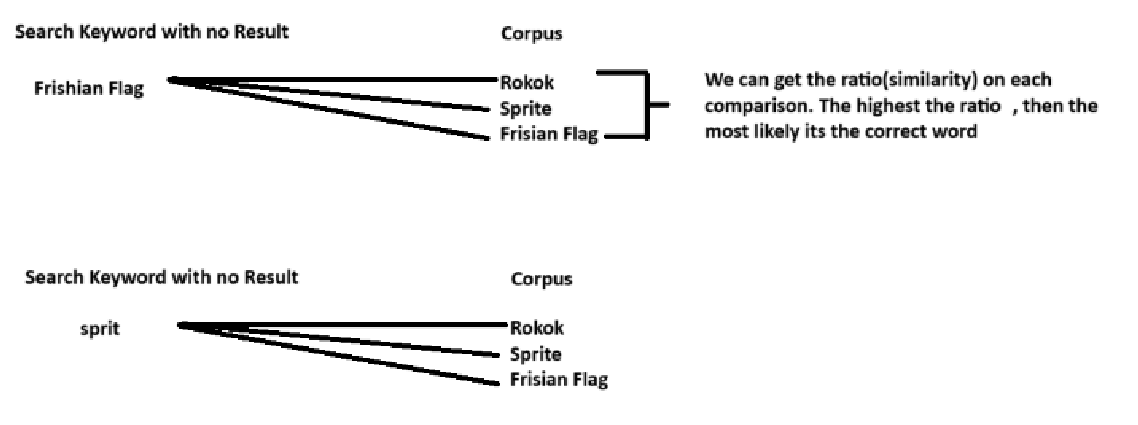

In [5]:
results = []

for query_index, query_row in query_df.iterrows():
    max_ratio = 0
    similar_product = None

    for product_index, product_row in product_df.iterrows():
        ratio = SequenceMatcher(None, query_row['search_keyword'].lower(), product_row['product_name'].lower()).ratio()

        if ratio > max_ratio:
            max_ratio = ratio
            similar_product = product_row['product_name']
    print(f'✅ checked row {query_index + 1}:', query_row['search_keyword'])
    results.append([query_row['search_keyword'], max_ratio, similar_product])

result_df = pd.DataFrame(results, columns=['search_keyword', 'Max Ratio', 'Similar Product Name'], index=range(19))

✅ checked row 1: frishian flag
✅ checked row 2: Beby happy
✅ checked row 3: pepaodent
✅ checked row 4: Aqua gelon
✅ checked row 5: sari rotu
✅ checked row 6: mama lem
✅ checked row 7: chochopie
✅ checked row 8: you c1000 minuman
✅ checked row 9: Samyang
✅ checked row 10: kojiesan
✅ checked row 11: freastea
✅ checked row 12: sosis kenzeler
✅ checked row 13: Aqu
✅ checked row 14: proklin
✅ checked row 15: biskuit
✅ checked row 16: mereies
✅ checked row 17: jaz
✅ checked row 18: Matcha
✅ checked row 19: tropic


In [6]:
result_df

,search_keyword,Max Ratio,Similar Product Name
0,frishian flag,0.960000,frisian flag
1,Beby happy,0.900000,baby happy
2,pepaodent,0.888889,pepsodent
3,Aqua gelon,0.900000,AQUA Galon
4,sari rotu,0.888889,sari roti
5,mama lem,0.888889,mama lemon
6,chochopie,0.888889,CHOCO PIE
7,you c1000 minuman,1.000000,YOU C1000 Minuman
8,Samyang,1.000000,samyang
9,kojiesan,1.000000,kojiesan


In [8]:
final_result = pd.merge(result_df, query_df, on='search_keyword', how='left')
final_result

,search_keyword,Max Ratio,Similar Product Name,Total Search
0,frishian flag,0.960000,frisian flag,49332
1,Beby happy,0.900000,baby happy,47776
2,pepaodent,0.888889,pepsodent,36290
3,Aqua gelon,0.900000,AQUA Galon,23185
4,sari rotu,0.888889,sari roti,17806
5,mama lem,0.888889,mama lemon,17550
6,chochopie,0.888889,CHOCO PIE,16593
7,you c1000 minuman,1.000000,YOU C1000 Minuman,15488
8,Samyang,1.000000,samyang,15141
9,kojiesan,1.000000,kojiesan,14979
